#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 9
### Due: Monday, Apr 4th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Apr 4th.

---

## Problem 1

**Cross-Correlation for computing a time lag**



Using the code snipplet below, generate a pair of time series with known time lag.

The scipy.signal function is used to generate a two-unit impulse function. We then apply a low pass filter of order 4 and with a center frequency of 0.2 to smoothen the edges. (Note that the results will be the same even without the filter).


a) plot the time series

b) compute the lag by computing the time-domain cross-correlation between two-time series.


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
import scipy.signal as signal
from scipy.ndimage.interpolation import shift

In [2]:
# Delta Function
length = 100
amp1, amp2 = 1, 1
x = np.arange(0, length)
to = 10
timeshift = 50
t1 = to+timeshift
series1 = signal.unit_impulse(length, idx=to)
series2 = signal.unit_impulse(length, idx=t1)

# low pass filter to smoothen the edges (just to make the signal look pretty)
b, a = signal.butter(4, 0.2)
series1 = signal.lfilter(b, a, series1)
series2 = signal.lfilter(b, a, series2)

### Solution

Plot time series

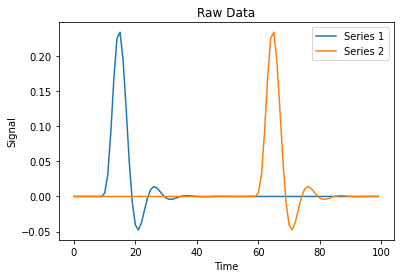

In [3]:
plt.plot(series1,label="Series 1")
plt.plot(series2,label="Series 2")
plt.ylabel("Signal")
plt.xlabel("Time")
plt.title("Raw Data")
plt.legend()

Compute time lagged correlation

Text(0.5, 1.0, 'Time Lagged Correlation')

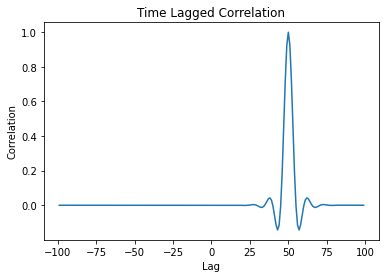

In [4]:
#Compute cross correlation
correlation = scipy.signal.correlate(series2,series1, mode="full")        
correlation /= np.max(correlation)                                    
for result in range(math.ceil(len(scipy.signal.convolve(series2,series1))/2+2)): lagUpSignal = result - math.ceil(np.max(correlation))
lagDownSignal = scipy.signal.decimate(series2, 1).size
lags = signal.correlation_lags(lagDownSignal, lagUpSignal, mode="full")
#Plot
plt.plot(lags, correlation)
plt.ylabel("Correlation")
plt.xlabel("Lag")
plt.title("Time Lagged Correlation")

In [5]:
#Use time-domain cross-correlation between the two time series to get lag
lag = lags[np.argmax(correlation)]
print(lag)

50
